In [1]:
crdt_crd<-read.csv("D:\\R_TXT_MINE_DATA\\creditcard.csv",header = TRUE,
                   stringsAsFactors = FALSE,
                   strip.white = TRUE ,
                   sep = ',')

#checking overall dataset and coverting 'class' as factor variables 
str(crdt_crd)
crdt_crd$Class = as.factor(crdt_crd$Class)
str(crdt_crd$Class)

'data.frame':	284807 obs. of  31 variables:
 $ Time  : num  0 0 1 1 2 2 4 7 7 9 ...
 $ V1    : num  -1.36 1.192 -1.358 -0.966 -1.158 ...
 $ V2    : num  -0.0728 0.2662 -1.3402 -0.1852 0.8777 ...
 $ V3    : num  2.536 0.166 1.773 1.793 1.549 ...
 $ V4    : num  1.378 0.448 0.38 -0.863 0.403 ...
 $ V5    : num  -0.3383 0.06 -0.5032 -0.0103 -0.4072 ...
 $ V6    : num  0.4624 -0.0824 1.8005 1.2472 0.0959 ...
 $ V7    : num  0.2396 -0.0788 0.7915 0.2376 0.5929 ...
 $ V8    : num  0.0987 0.0851 0.2477 0.3774 -0.2705 ...
 $ V9    : num  0.364 -0.255 -1.515 -1.387 0.818 ...
 $ V10   : num  0.0908 -0.167 0.2076 -0.055 0.7531 ...
 $ V11   : num  -0.552 1.613 0.625 -0.226 -0.823 ...
 $ V12   : num  -0.6178 1.0652 0.0661 0.1782 0.5382 ...
 $ V13   : num  -0.991 0.489 0.717 0.508 1.346 ...
 $ V14   : num  -0.311 -0.144 -0.166 -0.288 -1.12 ...
 $ V15   : num  1.468 0.636 2.346 -0.631 0.175 ...
 $ V16   : num  -0.47 0.464 -2.89 -1.06 -0.451 ...
 $ V17   : num  0.208 -0.115 1.11 -0.684 -0.237 ...
 $ V

In [3]:
crdt_crd_nw<-crdt_crd[,c("V17","V14","V12","V11","V10","V9","V16","V4","V18","V7","V22","V6","V21","Class")]
head(crdt_crd_nw)
str(crdt_crd_nw)

V17,V14,V12,V11,V10,V9,V16,V4,V18,V7,V22,V6,V21,Class
0.20797124,-0.3111694,-0.61780086,-0.5515995,0.09079417,0.3637870,-0.4704005,1.3781552,0.02579058,0.23959855,0.277837576,0.46238778,-0.018306778,0
-0.11480466,-0.1437723,1.06523531,1.6127267,-0.16697441,-0.2554251,0.4639170,0.4481541,-0.18336127,-0.07880298,-0.638671953,-0.08236081,-0.225775248,0
1.10996938,-0.1659459,0.06608369,0.6245015,0.20764287,-1.5146543,-2.8900832,0.3797796,-0.12135931,0.79146096,0.771679402,1.80049938,0.247998153,0
-0.68409279,-0.2879237,0.17822823,-0.2264873,-0.05495192,-1.3870241,-1.0596472,-0.8632913,1.96577500,0.23760894,0.005273597,1.24720317,-0.108300452,0
-0.23703324,-1.1196698,0.53819555,-0.8228429,0.75307443,0.8177393,-0.4514492,0.4030339,-0.03819479,0.59294075,0.798278495,0.09592146,-0.009430697,0
-0.05813282,-0.1371337,0.35989384,1.3412620,-0.37140720,-0.5686714,0.4017259,-0.1682521,0.06865315,0.47620095,-0.559824796,-0.02972755,-0.208253515,0


'data.frame':	284807 obs. of  14 variables:
 $ V17  : num  0.208 -0.115 1.11 -0.684 -0.237 ...
 $ V14  : num  -0.311 -0.144 -0.166 -0.288 -1.12 ...
 $ V12  : num  -0.6178 1.0652 0.0661 0.1782 0.5382 ...
 $ V11  : num  -0.552 1.613 0.625 -0.226 -0.823 ...
 $ V10  : num  0.0908 -0.167 0.2076 -0.055 0.7531 ...
 $ V9   : num  0.364 -0.255 -1.515 -1.387 0.818 ...
 $ V16  : num  -0.47 0.464 -2.89 -1.06 -0.451 ...
 $ V4   : num  1.378 0.448 0.38 -0.863 0.403 ...
 $ V18  : num  0.0258 -0.1834 -0.1214 1.9658 -0.0382 ...
 $ V7   : num  0.2396 -0.0788 0.7915 0.2376 0.5929 ...
 $ V22  : num  0.27784 -0.63867 0.77168 0.00527 0.79828 ...
 $ V6   : num  0.4624 -0.0824 1.8005 1.2472 0.0959 ...
 $ V21  : num  -0.01831 -0.22578 0.248 -0.1083 -0.00943 ...
 $ Class: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...


In [4]:
library(e1071)
svm_model<-svm(Class~V21+V22+V14+V10+V4,data=crdt_crd_nw)
summary(svm_model)


Call:
svm(formula = Class ~ V21 + V22 + V14 + V10 + V4, data = crdt_crd_nw)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.2 

Number of Support Vectors:  1644

 ( 1356 288 )


Number of Classes:  2 

Levels: 
 0 1




In [5]:
pred <- predict(svm_model,crdt_crd_nw)
table(pred,crdt_crd_nw$Class)


    
pred      0      1
   0 284289     95
   1     26    397

In [7]:
library(caTools)

split = sample.split(crdt_crd_nw$Class, SplitRatio = .8)
training_data = subset(crdt_crd_nw, split == TRUE)
test_data = subset(crdt_crd_nw, split == FALSE)
nrow(training_data)
nrow(test_data)

[1] 227846

[1] 56961

In [8]:

svm_mod = svm(Class~V21+V22+V14+V10+V4, data = training_data,
                  type = 'C-classification', kernel = 'radial')
summary(svm_mod)


Call:
svm(formula = Class ~ V21 + V22 + V14 + V10 + V4, data = training_data, 
    type = "C-classification", kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.2 

Number of Support Vectors:  1469

 ( 1224 245 )


Number of Classes:  2 

Levels: 
 0 1




In [9]:

test_pred = predict(svm_mod, test_data[,-31])
table(test_pred,test_data$Class)

         
test_pred     0     1
        0 56859    29
        1     4    69

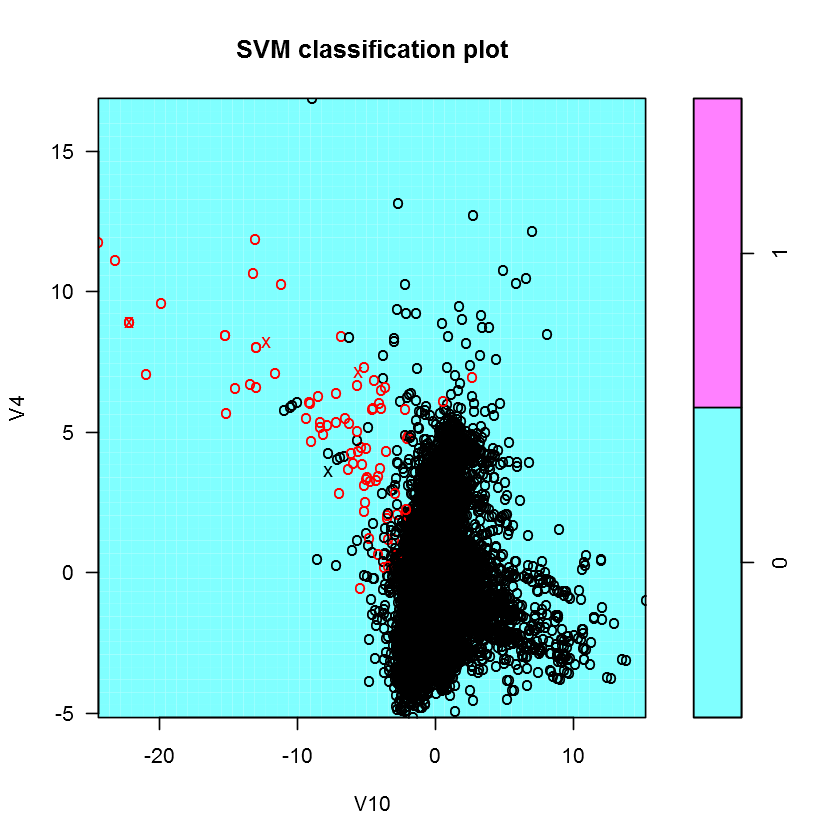

In [10]:
plot(svm_mod,test_data,V4~V10)

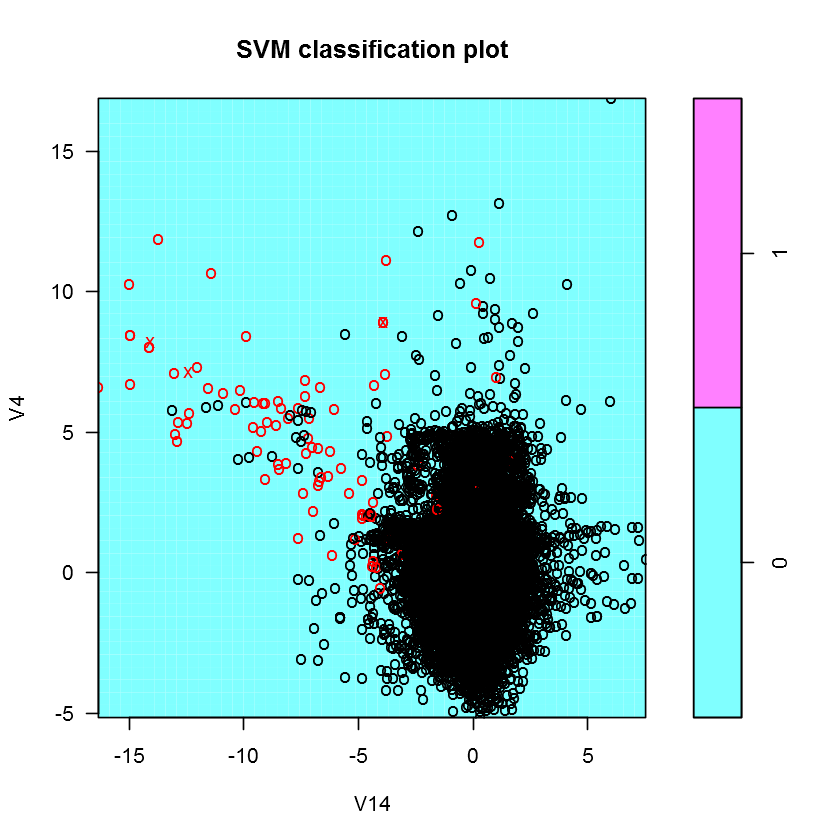

In [11]:
plot(svm_mod,test_data,V4~V14)

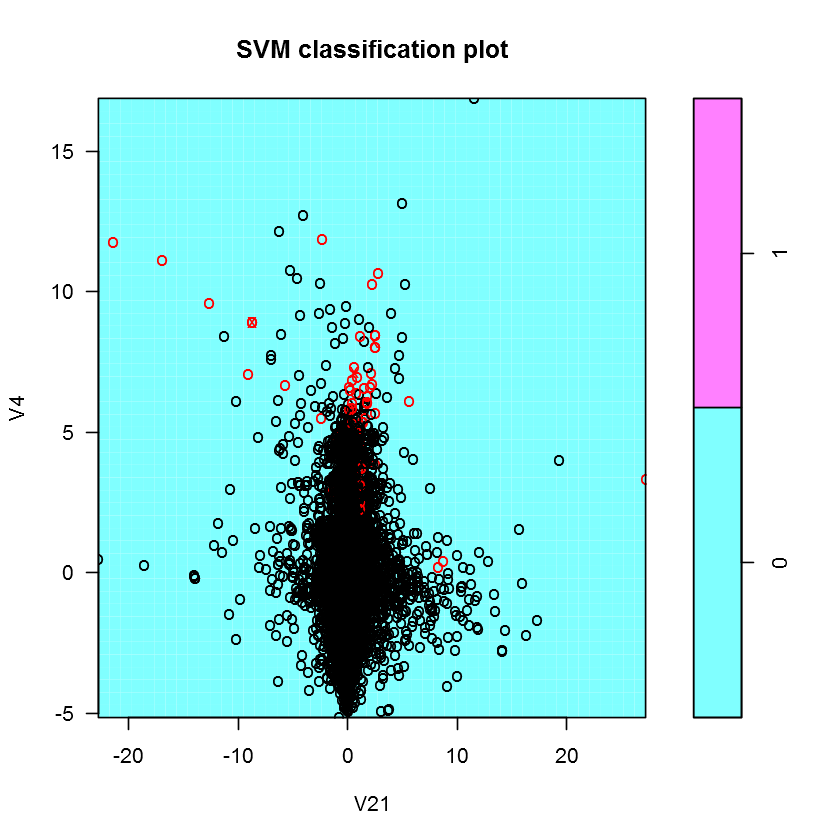

In [12]:
plot(svm_mod,test_data,V4~V21)

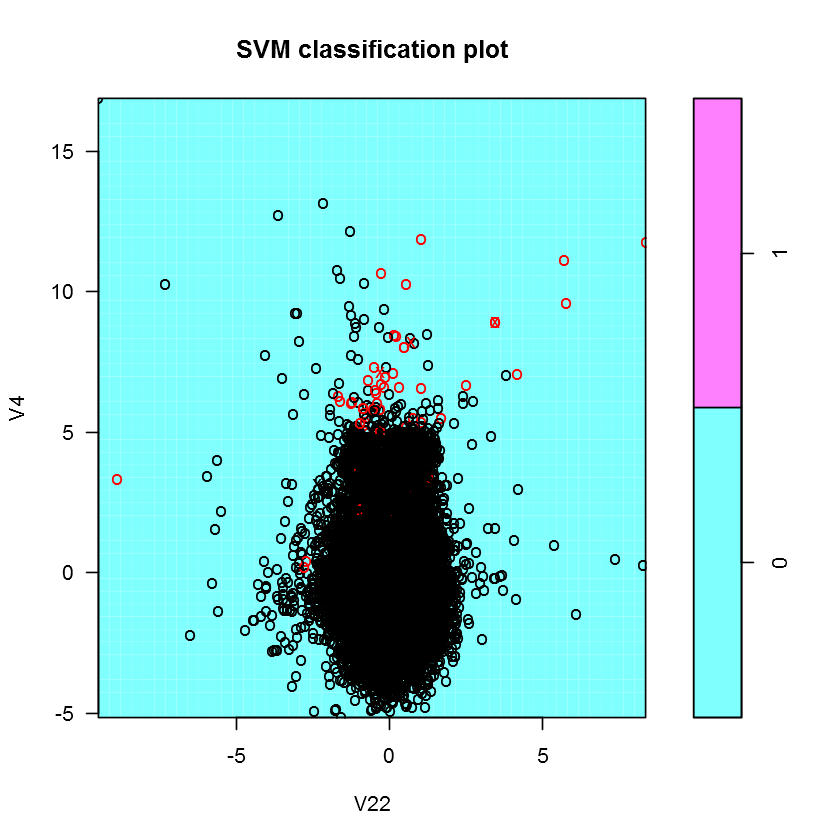

In [13]:
plot(svm_mod,test_data,V4~V22)

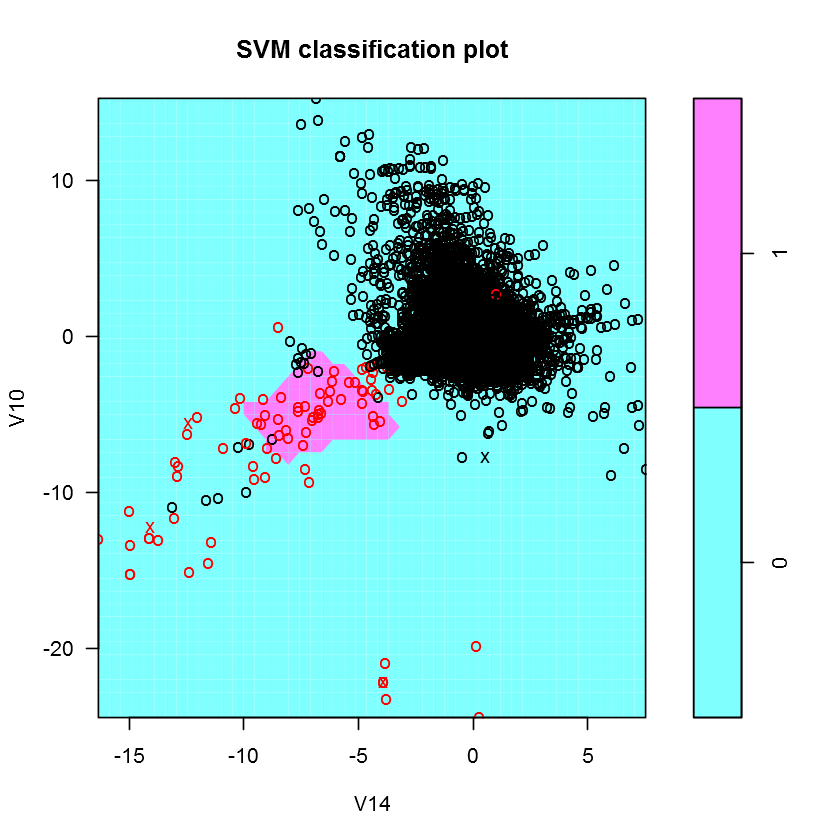

In [14]:
plot(svm_mod,test_data,V10~V14)

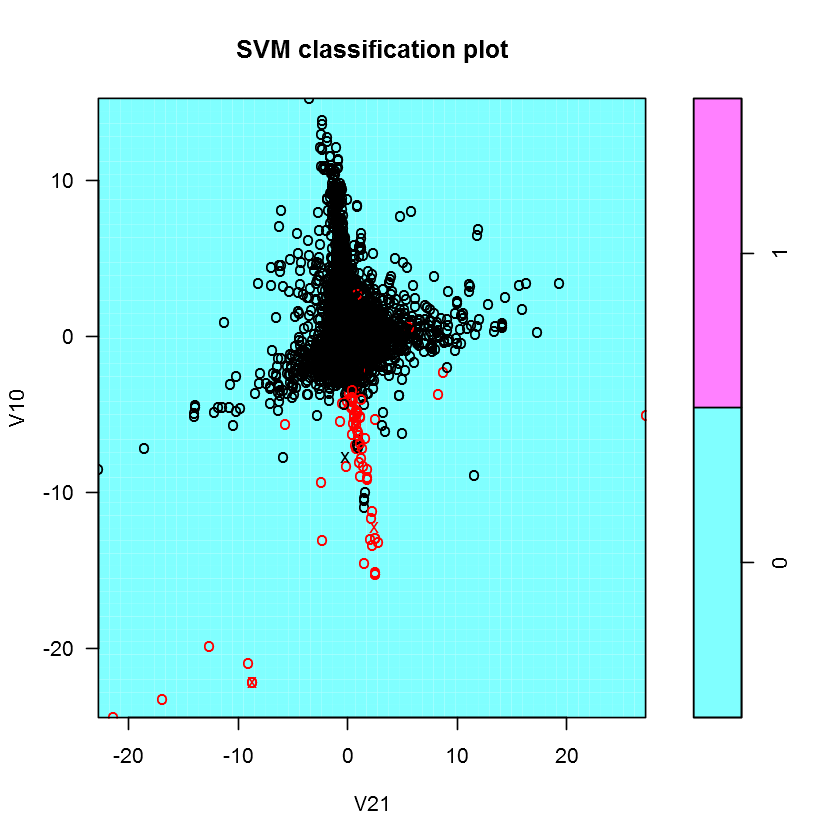

In [15]:
plot(svm_mod,test_data,V10~V21)

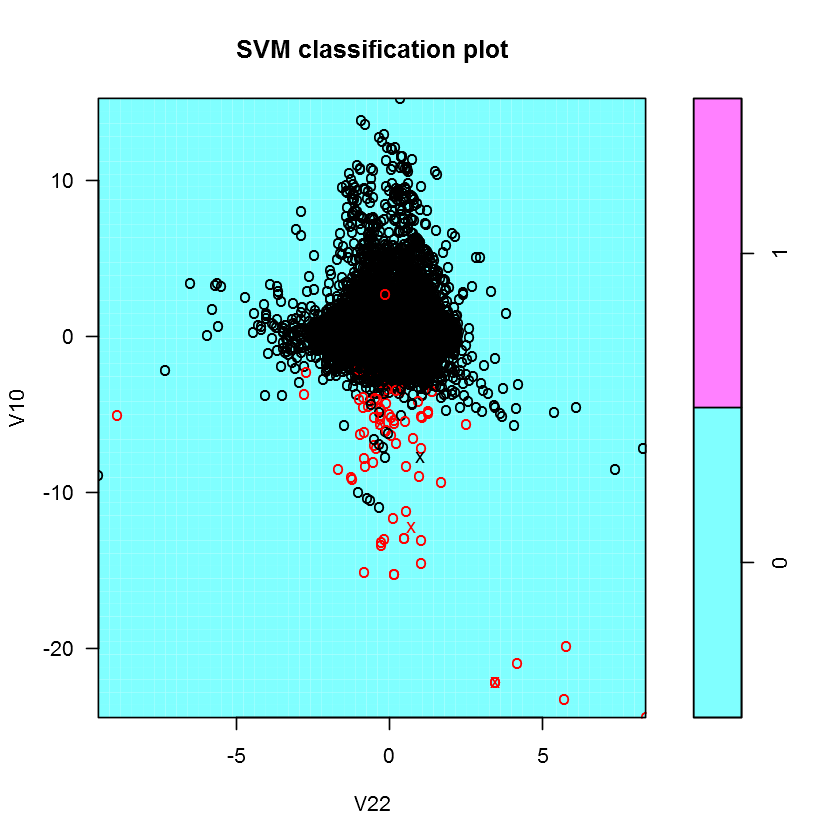

In [16]:
plot(svm_mod,test_data,V10~V22)

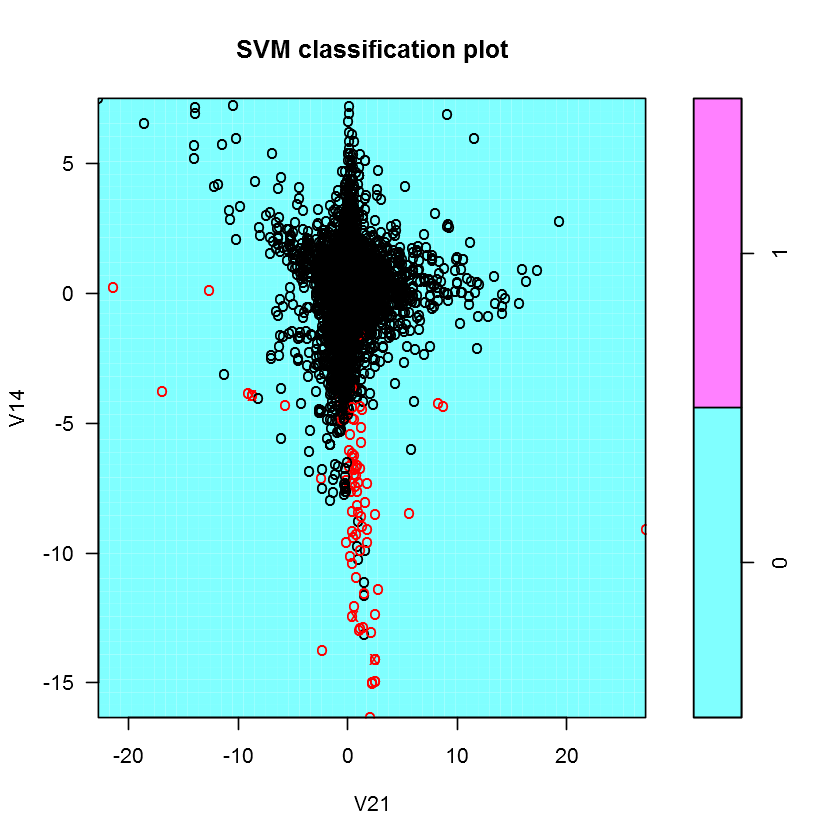

In [17]:
plot(svm_mod,test_data,V14~V21)

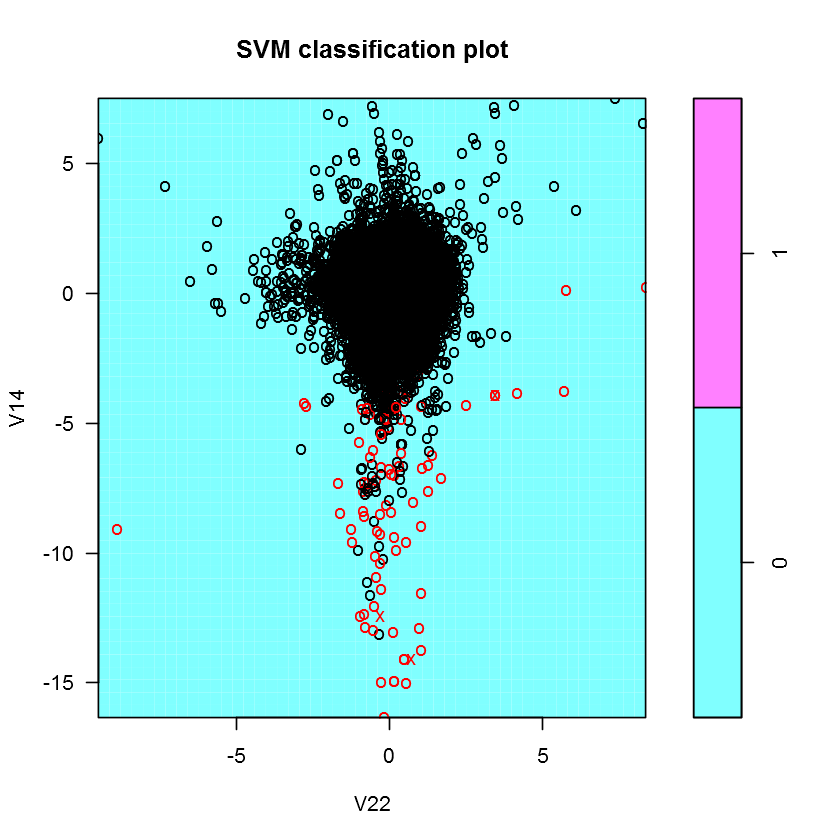

In [18]:
plot(svm_mod,test_data,V14~V22)

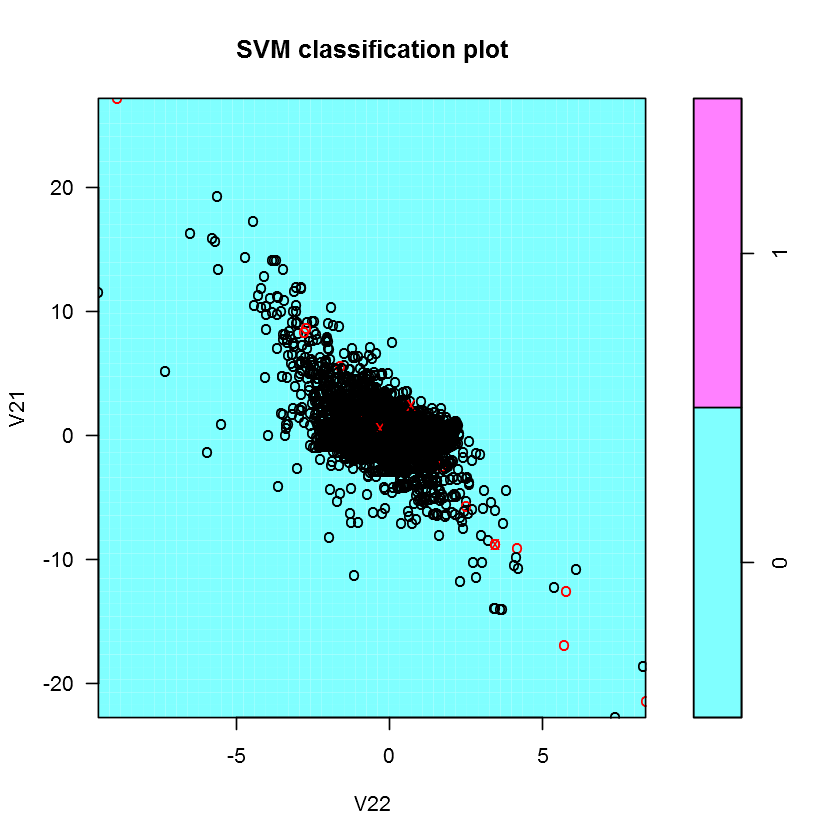

In [19]:
plot(svm_mod,test_data,V21~V22)